In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline
import scipy.stats as st
from datetime import datetime
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from statsmodels.graphics.mosaicplot import mosaic
from pylab import figure, axes, pie, title, show

In [3]:
import pandas as pd

idx = pd.date_range('09-01-2013', '09-30-2013')

s = pd.Series({'09-02-2013': 2,
               '09-03-2013': 10,
               '09-06-2013': 5,
               '09-07-2013': 1})
s.index = pd.DatetimeIndex(s.index)

s = s.reindex(idx, fill_value=0)
print(s)

2013-09-01     0
2013-09-02     2
2013-09-03    10
2013-09-04     0
2013-09-05     0
2013-09-06     5
2013-09-07     1
2013-09-08     0
2013-09-09     0
2013-09-10     0
2013-09-11     0
2013-09-12     0
2013-09-13     0
2013-09-14     0
2013-09-15     0
2013-09-16     0
2013-09-17     0
2013-09-18     0
2013-09-19     0
2013-09-20     0
2013-09-21     0
2013-09-22     0
2013-09-23     0
2013-09-24     0
2013-09-25     0
2013-09-26     0
2013-09-27     0
2013-09-28     0
2013-09-29     0
2013-09-30     0
Freq: D, dtype: int64


In [4]:
# import dataset
print("Loading dataset...")
data = pd.read_csv("Walmart_Store_sales.csv")
print("...Done.")
# print(dataset.shape)
# print(dataset.describe(include="all"))

Loading dataset...
...Done.


In [5]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
...,...,...,...,...,...,...,...,...
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
146,7.0,NaN,716388.81,NaN,20.74,2.778,NaN,NaN
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


In [6]:
data1 = data.copy()
data1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
...,...,...,...,...,...,...,...,...
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
146,7.0,NaN,716388.81,NaN,20.74,2.778,NaN,NaN
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


In [7]:
data1.isnull().sum()

Store            0
Date            18
Weekly_Sales    14
Holiday_Flag    12
Temperature     18
Fuel_Price      14
CPI             12
Unemployment    15
dtype: int64

In [8]:
data1.isna().sum()

Store            0
Date            18
Weekly_Sales    14
Holiday_Flag    12
Temperature     18
Fuel_Price      14
CPI             12
Unemployment    15
dtype: int64

In [9]:
#data1.Weekly_Sales = data1['Weekly_Sales'].replace{}'NaN': weekMean, inplace = True)
#data1["Weekly_Sales"]= data1["Weekly_Sales"].replace({"NaN": weekMean}, inplace=True)
#data1['Weekly_Sales'].fillna(value=data1['Weekly_Sales'].mean(), inplace=True)
#data1.Weekly_Sales = data1.Weekly_Sales.fillna(value=data1['Weekly_Sales'].mean(), inplace=True)

In [10]:
data1.mean()

Store           9.866667e+00
Weekly_Sales    1.249536e+06
Holiday_Flag    7.971014e-02
Temperature     6.139811e+01
Fuel_Price      3.320853e+00
CPI             1.798985e+02
Unemployment    7.598430e+00
dtype: float64

In [11]:
data1['Weekly_Sales']= data1.Weekly_Sales.fillna(data1.Weekly_Sales.mean())

In [12]:
data1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1.572118e+06,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1.807545e+06,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,1.249536e+06,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1.244390e+06,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1.644471e+06,0.0,78.89,2.759,212.412888,7.092
...,...,...,...,...,...,...,...,...
145,14.0,18-06-2010,2.248646e+06,0.0,72.62,2.780,182.442420,8.899
146,7.0,NaN,7.163888e+05,NaN,20.74,2.778,NaN,NaN
147,17.0,11-06-2010,8.452522e+05,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,8.567961e+05,0.0,86.05,3.638,219.007525,NaN


In [13]:
X = data1.iloc[:, 4:0]
X

""
0
1
2
3
4
...
145
146
147
148


In [14]:
X2 = data1.Weekly_Sales

In [15]:
weekMean = round(data1.Weekly_Sales.mean(),2)

In [17]:
cleaner = SimpleImputer(strategy='mean')
cleaner.fit(X)

ValueError: at least one array or dtype is required

In [18]:
cleaner.transform(X)

NotFittedError: This SimpleImputer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [19]:
data1['Holiday_Flag'] = data1['Holiday_Flag'].fillna(0)

In [20]:
print(data.describe(include="all"))

             Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
count   150.000000         132  1.360000e+02    138.000000   132.000000   
unique         NaN          85           NaN           NaN          NaN   
top            NaN  07-01-2011           NaN           NaN          NaN   
freq           NaN           4           NaN           NaN          NaN   
mean      9.866667         NaN  1.249536e+06      0.079710    61.398106   
std       6.231191         NaN  6.474630e+05      0.271831    18.378901   
min       1.000000         NaN  2.689290e+05      0.000000    18.790000   
25%       4.000000         NaN  6.050757e+05      0.000000    45.587500   
50%       9.000000         NaN  1.261424e+06      0.000000    62.985000   
75%      15.750000         NaN  1.806386e+06      0.000000    76.345000   
max      20.000000         NaN  2.771397e+06      1.000000    91.650000   

        Fuel_Price         CPI  Unemployment  
count   136.000000  138.000000    135.000000  
uniqu

In [21]:
data.shape

(150, 8)

In [22]:
data['Store'].unique

<bound method Series.unique of 0       6.0
1      13.0
2      17.0
3      11.0
4       6.0
       ... 
145    14.0
146     7.0
147    17.0
148     8.0
149    19.0
Name: Store, Length: 150, dtype: float64>

In [23]:
data.isnull().sum()

Store            0
Date            18
Weekly_Sales    14
Holiday_Flag    12
Temperature     18
Fuel_Price      14
CPI             12
Unemployment    15
dtype: int64

In [24]:
data.isnull().sum().value_counts()

18    2
12    2
14    2
0     1
15    1
dtype: int64

In [25]:
data.isnull().sum()[data.isnull().sum() == 0]

Store    0
dtype: int64

In [26]:
data.columns.value_counts(normalize = True)

Fuel_Price      0.125
Date            0.125
Temperature     0.125
CPI             0.125
Unemployment    0.125
Weekly_Sales    0.125
Holiday_Flag    0.125
Store           0.125
dtype: float64

In [27]:
#data['Holiday_Flag'].fillna(0, inplace = True)
#data.isnull().sum()

In [28]:
#df.drop(df[df['Age'] < 25].index, inplace = True)
data = data.dropna(how = 'any')
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [29]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961
10,8.0,19-08-2011,895066.50,0.0,82.92,3.554,219.070197,6.425
...,...,...,...,...,...,...,...,...
139,7.0,25-05-2012,532739.77,0.0,50.60,3.804,197.588605,8.090
143,3.0,04-06-2010,396968.80,0.0,78.53,2.705,214.495838,7.343
144,3.0,19-10-2012,424513.08,0.0,73.44,3.594,226.968844,6.034
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899


In [30]:
# Basic stats
#Nombre de lignes
print("Number of rows : {}".format(data.shape[0]))
print()

print("Display of dataset: ")
#display imprime plus joliment
display(data.head())
print()

print("Basics statistics: ")
data_desc = data.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*data.isnull().sum()/data.shape[0])

Number of rows : 75

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961
10,8.0,19-08-2011,895066.50,0.0,82.92,3.554,219.070197,6.425



Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,75.000000,75,7.500000e+01,75.000000,75.000000,75.000000,75.000000,75.000000
unique,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,16-03-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
mean,10.093333,NaN,1.202392e+06,0.093333,60.469600,3.325920,176.073438,7.660453
std,6.100893,NaN,6.754152e+05,0.292858,17.338982,0.494012,40.155442,1.763908
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.548000,126.114581,5.143000
25%,4.500000,NaN,5.469425e+05,0.000000,45.465000,2.835000,131.033780,6.597500
50%,10.000000,NaN,1.074079e+06,0.000000,61.110000,3.435000,192.826069,7.470000
75%,15.500000,NaN,1.806773e+06,0.000000,75.180000,3.742000,214.703622,8.102500



Percentage of missing values: 


Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

In [31]:
data.dtypes

Store           float64
Date             object
Weekly_Sales    float64
Holiday_Flag    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [32]:
data["Date1"] = pd.to_datetime(data["Date"])
data.dtypes

<ipython-input-32-e5f1c81c4a55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date1"] = pd.to_datetime(data["Date"])


Store                  float64
Date                    object
Weekly_Sales           float64
Holiday_Flag           float64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Date1           datetime64[ns]
dtype: object

In [33]:
data['Store'].value_counts()

3.0     8
13.0    7
19.0    6
7.0     6
5.0     5
4.0     4
8.0     4
12.0    4
1.0     4
18.0    4
16.0    3
20.0    3
17.0    3
2.0     3
14.0    3
15.0    2
10.0    2
6.0     2
9.0     1
11.0    1
Name: Store, dtype: int64

<AxesSubplot:>

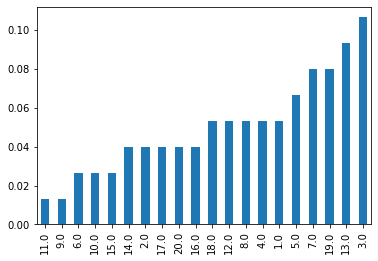

In [34]:
((data['Store'].value_counts()/ len(data))).sort_values().plot.bar()

C:\Users\phili\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

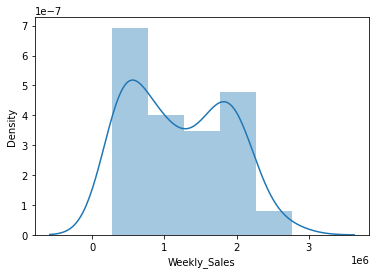

In [36]:
sns.distplot(data['Weekly_Sales'])

<AxesSubplot:>

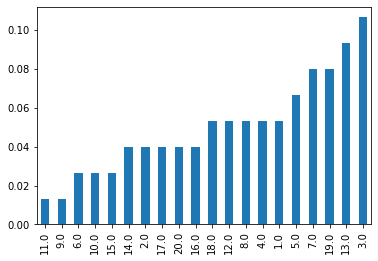

In [37]:
((data['Store'].value_counts()/ len(data))).sort_values().plot.bar()

In [38]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Date1'],
      dtype='object')

In [39]:
df2 = data[['Store', 'Weekly_Sales']].groupby(['Store']).agg({'Weekly_Sales':['sum', 'count']}).reset_index()
df2

Store Weekly_Sales      
                  sum count
0    1.0   6353165.42     4
1    2.0   5536666.23     3
2    3.0   3262752.17     8
3    4.0   9118478.34     4
4    5.0   1460266.06     5
5    6.0   3283829.59     2
6    7.0   3126656.34     6
7    8.0   3615392.53     4
8    9.0    519823.30     1
9   10.0   3796370.81     2
10  11.0   1757242.51     1
11  12.0   4175792.54     4
12  13.0  14166114.84     7
13  14.0   6222741.34     3
14  15.0   1266007.42     2
15  16.0   1534745.93     3
16  17.0   2506824.37     3
17  18.0   4231001.18     4
18  19.0   8269097.73     6
19  20.0   5976396.86     3

In [40]:
df3 =data.groupby('Date1')['Weekly_Sales'].sum().reset_index()
df3['Weekly_Sales']= df3['Weekly_Sales'].astype(int)

In [41]:
df3.dtypes

Date1           datetime64[ns]
Weekly_Sales             int32
dtype: object

In [42]:
mask = (df3['Date1']> '2010-01-01')&(df3['Date1']<= '2010-12-31')
print(df3.loc[mask])

        Date1  Weekly_Sales
0  2010-01-10        829207
1  2010-02-04        561145
2  2010-02-07       3567333
3  2010-03-26       1427023
4  2010-04-06        396968
5  2010-04-16        757738
6  2010-05-02        461622
7  2010-05-14       1494251
8  2010-05-28       1644470
9  2010-06-08       1166117
10 2010-06-18       2612722
11 2010-06-25       1973135
12 2010-07-30       1635324
13 2010-08-27        888816
14 2010-09-07        614253
15 2010-09-17        836707
16 2010-10-09        903119
17 2010-10-12       4763973
18 2010-10-15       1029618
19 2010-11-19        519823
20 2010-11-26       1757242
21 2010-12-02       2636758
22 2010-12-11       1916812
23 2010-12-17       1295605
24 2010-12-31       1799737


<AxesSubplot:ylabel='Weekly_Sales'>

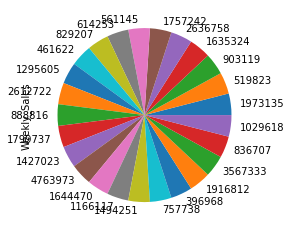

In [43]:
df3[(df3['Date1']>'2010-01-01') & (df3['Date1']<='2010-12-31')]['Weekly_Sales'].value_counts(normalize = True).plot.pie()

In [44]:
start_date = "2010-01-1"
end_date = "2010-12-31"

after_start_date = df3["Date1"] >= start_date
before_end_date = df3["Date1"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = df3.loc[between_two_dates]

In [45]:
df3['year'] = pd.DatetimeIndex(df3['Date1']).year
df3['month'] = pd.DatetimeIndex(df3['Date1']).month
df3['day'] = pd.DatetimeIndex(df3['Date1']).dayofweek
#df3['weekday'] = pd.DatetimeIndex(df3['Date1']).weekday
df3["weekday"] = df3["Date1"].dt.day_name()

In [46]:
df33 = df3.set_index("Date1")
df33

,Weekly_Sales,year,month,day,weekday
Date1,,,,,
2010-01-10,829207,2010,1,6,Sunday
2010-02-04,561145,2010,2,3,Thursday
2010-02-07,3567333,2010,2,6,Sunday
2010-03-26,1427023,2010,3,4,Friday
2010-04-06,396968,2010,4,1,Tuesday
2010-04-16,757738,2010,4,4,Friday
2010-05-02,461622,2010,5,6,Sunday
2010-05-14,1494251,2010,5,4,Friday
2010-05-28,1644470,2010,5,4,Friday


In [47]:
df331 = df33['2010-01':'2010-12']
display(df331)

,Weekly_Sales,year,month,day,weekday
Date1,,,,,
2010-01-10,829207,2010,1,6,Sunday
2010-02-04,561145,2010,2,3,Thursday
2010-02-07,3567333,2010,2,6,Sunday
2010-03-26,1427023,2010,3,4,Friday
2010-04-06,396968,2010,4,1,Tuesday
2010-04-16,757738,2010,4,4,Friday
2010-05-02,461622,2010,5,6,Sunday
2010-05-14,1494251,2010,5,4,Friday
2010-05-28,1644470,2010,5,4,Friday


In [48]:
df332 = df331.assign(missing= np.nan)
df332.missing[df332.Weekly_Sales.isna()] = df332.Weekly_Sales
df332.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25 entries, 2010-01-10 to 2010-12-31
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  25 non-null     int32  
 1   year          25 non-null     int64  
 2   month         25 non-null     int64  
 3   day           25 non-null     int64  
 4   weekday       25 non-null     object 
 5   missing       0 non-null      float64
dtypes: float64(1), int32(1), int64(3), object(1)
memory usage: 1.3+ KB


<ipython-input-48-816d973bc3fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df332.missing[df332.Weekly_Sales.isna()] = df332.Weekly_Sales


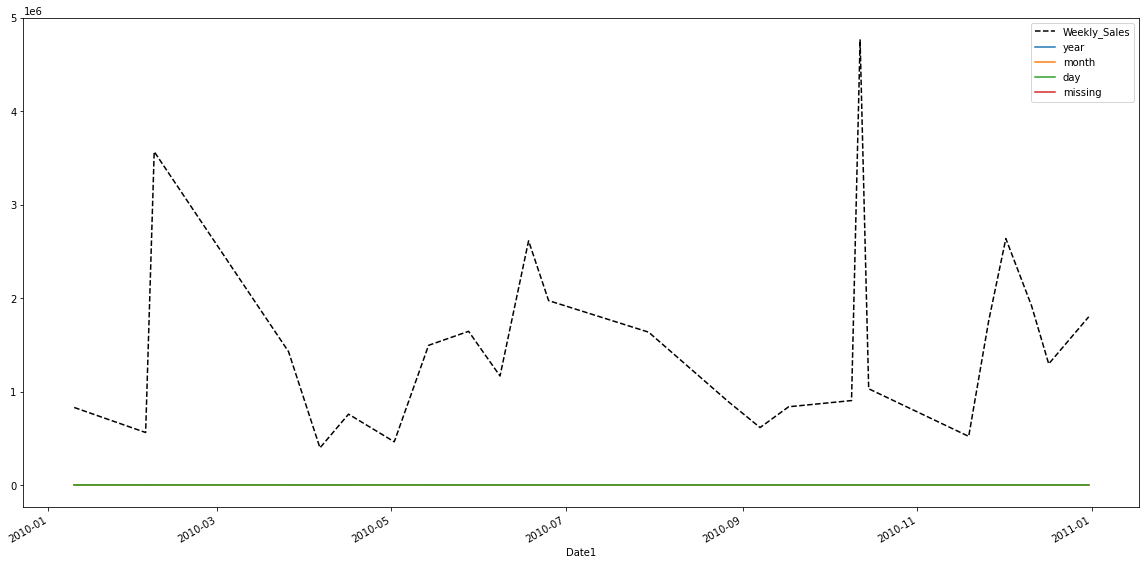

In [49]:
#df332.plot(style=['k--', 'bo-', 'r*'], figsize=(20, 10));
df332.plot(style=['k--'], figsize=(20, 10));

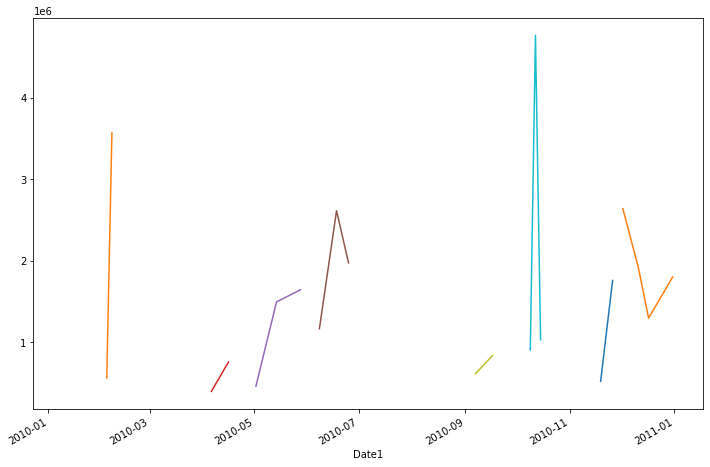

In [50]:
plt.figure(figsize= (12,8))
df331.resample('m').agg('Weekly_Sales').plot()
plt.show()


In [51]:
delta = datetime(2010,1,1) - datetime(2010, 12, 31)
delta

datetime.timedelta(days=-364)

In [52]:
df33.resample('W').sum()

,Weekly_Sales,year,month,day
Date1,,,,
2010-01-10,829207,2010,1,6
2010-01-17,0,0,0,0
2010-01-24,0,0,0,0
2010-01-31,0,0,0,0
2010-02-07,4128478,4020,4,9
...,...,...,...,...
2012-11-18,0,0,0,0
2012-11-25,0,0,0,0
2012-12-02,0,0,0,0


<AxesSubplot:xlabel='Date1'>

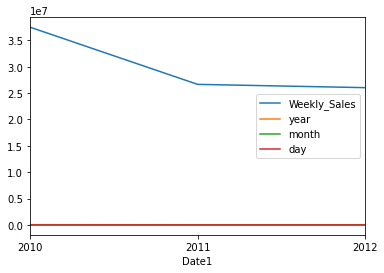

In [53]:
df33.resample('Y').sum().plot()

In [54]:
summary = pd.DataFrame(df3.groupby(['year',"weekday"]).mean().astype('int')["Weekly_Sales"]) 
summary

Weekly_Sales
year weekday               
2010 Friday         1405157
     Saturday       1409965
     Sunday         1619387
     Thursday       1598951
     Tuesday        1735327
2011 Friday         1572469
     Sunday          858275
     Thursday       2926255
2012 Friday         1602846
     Monday         1007939
     Thursday       1605503
     Tuesday         563460

In [56]:
df3 = data[['Store', 'Weekly_Sales']].groupby(['Store']).agg({'Weekly_Sales':['sum']}).reset_index()
df3

,Store,Weekly_Sales
,,sum
0,1.0,6353165.42
1,2.0,5536666.23
2,3.0,3262752.17
3,4.0,9118478.34
4,5.0,1460266.06
5,6.0,3283829.59
6,7.0,3126656.34
7,8.0,3615392.53
8,9.0,519823.30


In [57]:
df3.idxmax()

Store                19
Weekly_Sales  sum    12
dtype: int64

In [58]:
max_sales = data.groupby('Store')['Weekly_Sales'].sum()
max_sales.idxmax()

13.0

In [59]:
max_sales = data.groupby('Store')['Weekly_Sales'].sum()
max_sales.max()

14166114.84

In [60]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date1
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011-03-25
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010-05-28
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658,2011-03-06
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012-03-02
10,8.0,19-08-2011,895066.50,0.0,82.92,3.554,219.070197,6.425,2011-08-19
...,...,...,...,...,...,...,...,...,...
139,7.0,25-05-2012,532739.77,0.0,50.60,3.804,197.588605,8.090,2012-05-25
143,3.0,04-06-2010,396968.80,0.0,78.53,2.705,214.495838,7.343,2010-04-06
144,3.0,19-10-2012,424513.08,0.0,73.44,3.594,226.968844,6.034,2012-10-19
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010-06-18
